<h1 align="center">BDCC - Big Data Challenge</h1>

<p style="text-align:center">
    António Almeida, up201505836<br>
    Miguel Ramalho,  up201403027
</p>

This work is based on a dataset containing hospital events as described [here](https://mimic.physionet.org/mimictables/chartevents/), the provided dataset is _~4.2GB_ (compressed) and is available [here](https://console.cloud.google.com/storage/browser/big_events/?prefix=EVENTS.csv.gz). For the initial development of this report, a sample with 1M datapoints (the first 1M) was isolated.

More data regarding the same context can be found [here](http://www.dcc.fc.up.pt/~ines/MIMIC-III/)

### Install required libraries

In [4]:
!pip install matplotlib dask seaborn distributed > temp.txt

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Initial Imports

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns
sns.set()

In [7]:
import dask.dataframe as dd
from dask.distributed import Client
client = Client()

### Utilities functions

In [13]:
# reads a DASK DataFrame from an EVENTS csv
def read_events(filename):
    return dd.read_csv(filename, parse_dates=['CHARTTIME', 'STORETIME'], dtype={'CGID': 'float64','ICUSTAY_ID': 'float64'})

# Data Visualization
This section contains some of the requested plots and some more high level information about the dataset and its contents

In [16]:
%matplotlib inline

In [10]:
path = './EVENTS_1000000.csv'
df = read_events(path)

In [11]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249.0,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525.0,15.00,15.00,L/min,0,0,NaN,NaN
1,789,36,165660,241249.0,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525.0,100.00,100.00,NaN,0,0,NaN,NaN
2,790,36,165660,241249.0,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823.0,0.37,0.37,NaN,0,0,NaN,NaN
3,791,36,165660,241249.0,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,6.00,6.00,min,0,0,NaN,NaN
4,792,36,165660,241249.0,224330,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,2.50,2.50,NaN,0,0,NaN,NaN


In [12]:
df.compute().describe()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CGID,VALUE,VALUENUM,WARNING,ERROR,RESULTSTATUS,STOPPED
count,9.999990e+05,999999.000000,999999.000000,999542.000000,999999.000000,847390.000000,999999.000000,999999.000000,999999.000000,999999.000000,0.0,0.0
mean,5.003201e+05,5800.489858,148498.552431,254446.497683,222180.309609,18182.896204,85.618958,85.618958,0.065634,0.001921,NaN,NaN
std,2.892129e+05,3503.306794,27689.259457,31045.418397,2488.229065,2288.817959,778.306520,778.306520,0.247641,0.043787,NaN,NaN
min,1.000000e+00,23.000000,100009.000000,200203.000000,220045.000000,14023.000000,-610.000000,-610.000000,0.000000,0.000000,NaN,NaN
25%,2.500005e+05,2636.000000,128932.000000,225777.000000,220180.000000,16037.000000,17.000000,17.000000,0.000000,0.000000,NaN,NaN
50%,5.000000e+05,5885.000000,142471.000000,256064.000000,220277.000000,18462.000000,56.000000,56.000000,0.000000,0.000000,NaN,NaN
75%,7.499995e+05,8799.000000,172420.000000,284784.000000,224684.000000,20652.000000,97.000000,97.000000,0.000000,0.000000,NaN,NaN
max,1.058971e+06,10694.000000,199622.000000,299972.000000,228377.000000,21545.000000,598185.120000,598185.120000,1.000000,1.000000,NaN,NaN


### Scatter Plot of values per item
- For a given item, i.e., `ITEMID`, get its respective rows
- Plot its items, i.e., `VALUENUM` entries
- A scatter plot was used as it represents more appropriately the data presented

In [99]:
def item_hist(df, item):
    df[['ITEMID', 'CHARTTIME', 'VALUENUM']]\
        .query(f'ITEMID == {item}')\
        .compute()\
        .plot(x='CHARTTIME', y='VALUENUM', style='.', figsize=(14,7), title=f'Values for ITEMID {item}')
    
    # display options
    ax = plt.gca(); ax.set_xlabel('Time'); ax.set_ylabel('Values')

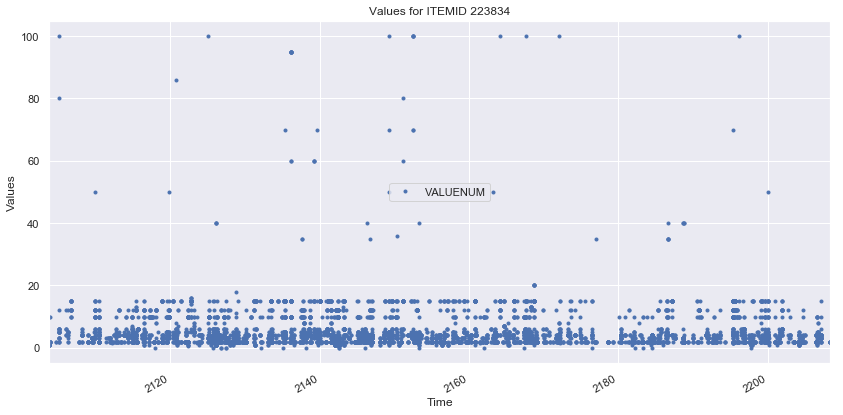

In [100]:
item_hist(df, item=223834)

### Histogram of values per patient

- For each patient, i.e., `SUBJECT_ID`, get its hospital admissions, i.e., `HADM_ID`
- For each hospital admission, plot the entries for each item, i.e., `VALUENUM` for each `ITEMID`
- A scatter plot was used as it represents more appropriately the data presented

In [93]:
# Get histogram of values per patient
def patient_hist(df, patient):
    df[['SUBJECT_ID', 'ITEMID', 'VALUENUM', 'HADM_ID']]\
                .query(f'SUBJECT_ID == {patient}')\
                .compute()\
                .groupby('HADM_ID')['ITEMID', 'VALUENUM']\
                .plot(x='ITEMID', y='VALUENUM', kind='scatter', figsize=(14,7), title="Values per patient", c="b")

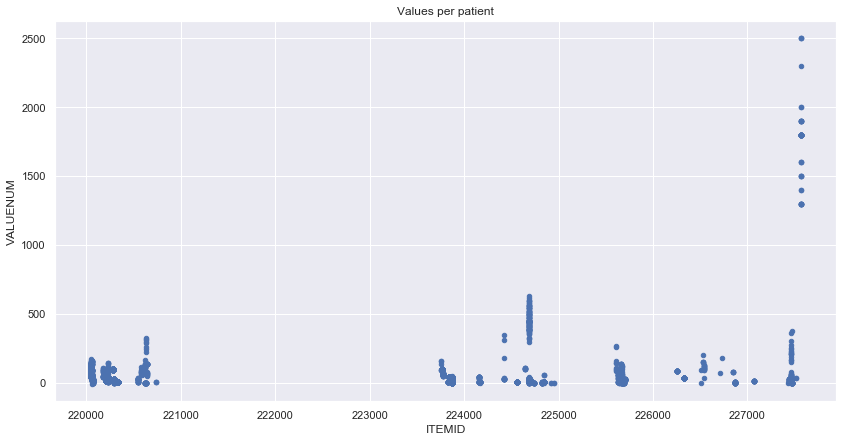

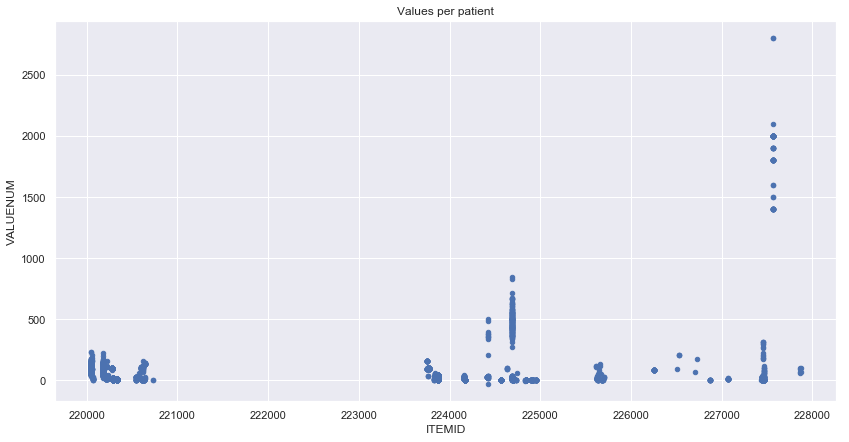

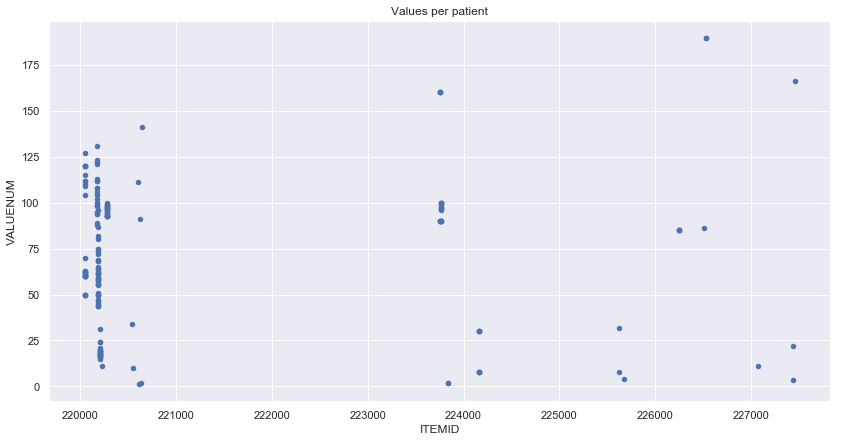

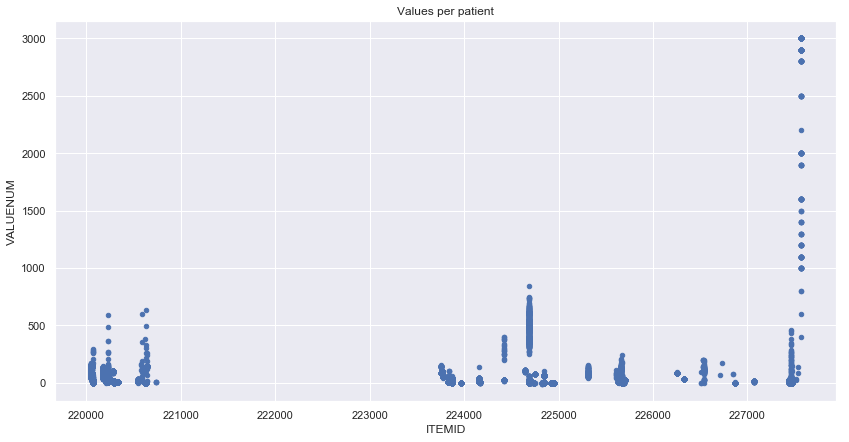

In [94]:
patient_hist(df, patient=2090)

### Histogram of frequency per item

In [97]:
# Get histogram of frequency per item
def item_hist(df):
    df[['ITEMID', 'VALUENUM']].compute().groupby('ITEMID').count().hist(figsize=(14, 7))
    
    # display options
    ax = plt.gca(); ax.set_xlabel('Items'); ax.set_ylabel('Frequency'); ax.set_title('Frequency per item')

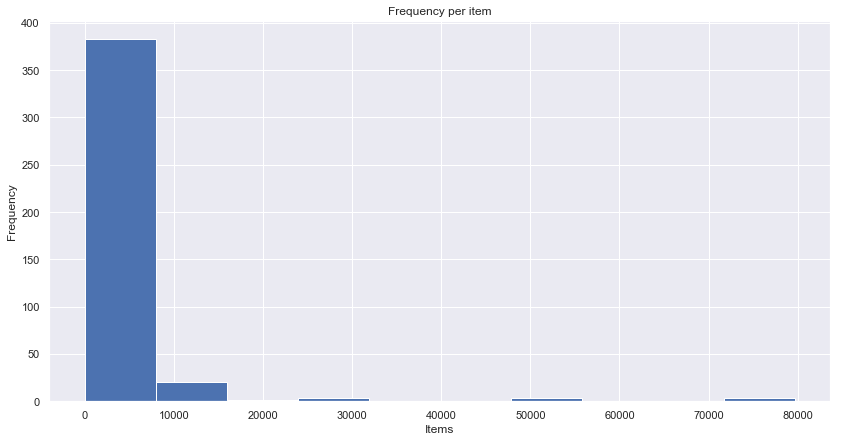

In [98]:
item_hist(df)

### Items's values over time for a given ICU
- For a given Intensive Care Unit instance, i.e., `ICUSTAY_ID`, get its entries
- Plot its items' values, i.e., `VALUENUM` entries, over time

In [74]:
def icu_hist(df, icu):
    df_icu = df[['SUBJECT_ID', 'VALUENUM', 'ICUSTAY_ID', 'CHARTTIME', 'ITEMID']]\
                .query(f'ICUSTAY_ID == {icu}')\
                .compute()
#                 .plot(x='CHARTTIME', y='VALUENUM', style='o')

#     fig = plt.gcf()
#     fig.set_size_inches(14, 7)
    
#     ax = plt.gca()
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Values')
#     ax.set_title('Items\' values over time')

    
    sns.relplot(x="CHARTTIME", y="VALUENUM", col="ICUSTAY_ID",
                # hue="ITEMID", #style="ITEMID", # size="VALUENUM",
                kind="line", legend="full",
                height=8, aspect=2, 
                data=df_icu);

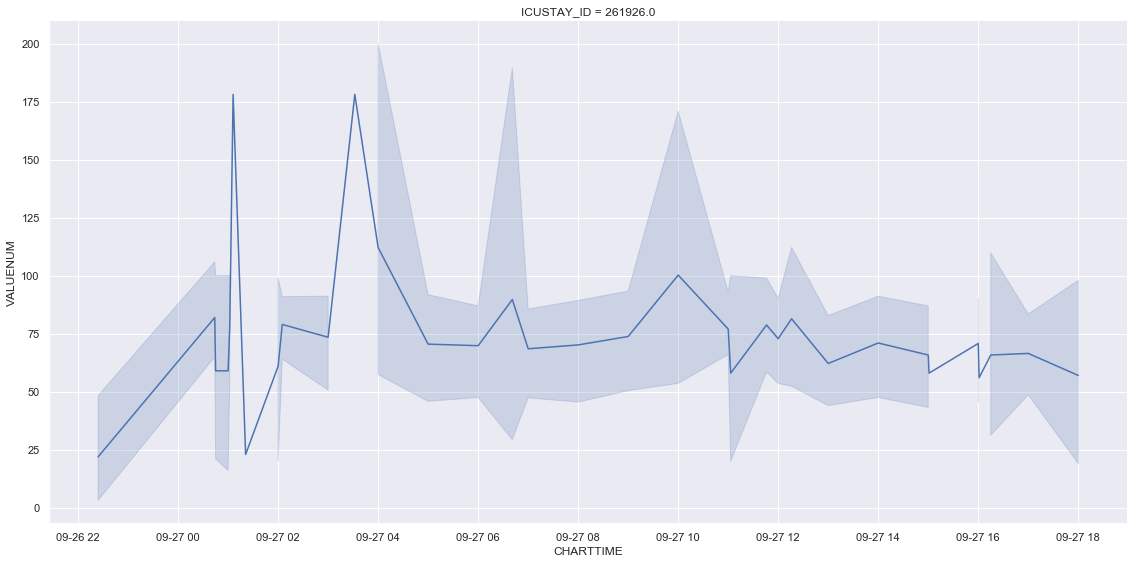

In [75]:
icu_hist(df, 261926)

# Machine Learning Task